Importing Libraries and dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv(r"D:\COURSES\Python\gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#last five rows
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#number of rows and columns
df.shape

(2290, 6)

In [10]:
#getting some basic information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
#checking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
#getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Exploratory Data Analysis

In [ ]:
#Correlation:
#1.Positive correlation-if one value increases, the other also increases
#2.Negative correlation-if one value increases, the other decreases

In [14]:
correlation=df.corr()

<AxesSubplot:>

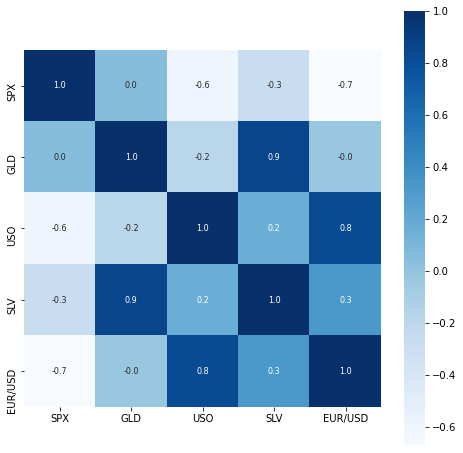

In [20]:
#heatmap to understand the correaltion
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [16]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


d:\PROJECTS\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

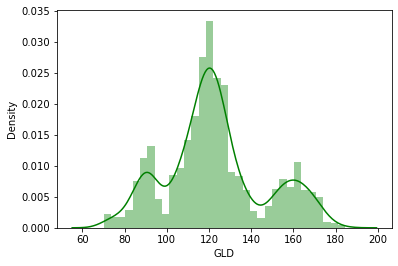

In [21]:
#distribution of GLD price
sns.distplot(df['GLD'],color='green')

Splitting the features and target

In [23]:
x=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [24]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [25]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Training the Random Forest Regression model

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [31]:
#prediction on Test data
test_data_prediction=regressor.predict(x_test)

In [32]:
print(test_data_prediction)

[168.72229951  81.85119966 116.38080003 127.59640062 120.68130124
 154.7557969  150.42159802 126.21360043 117.61589875 125.954701
 116.72420091 171.99710079 141.64169864 167.94629821 115.31540003
 117.84940014 138.75340379 170.02690114 159.59140239 161.54119928
 155.00150017 125.43750026 175.50379892 157.1217029  125.22580042
  93.73019945  78.10959984 120.29839996 119.11109931 167.49689983
  88.14900049 125.29180024  91.2032007  117.75750005 121.10659896
 136.74070073 115.54400135 115.26360087 148.87890021 107.03220047
 104.34850236  87.28169809 126.38220052 117.62710005 153.96319934
 119.91969981 108.48359998 108.13969853  93.15200078 127.14429761
  75.03000037 113.61199918 121.39040022 111.26209912 118.90079897
 120.49499922 159.6263003  168.01380112 146.55159652  85.65829867
  94.28520033  86.92149873  90.57400043 118.97190051 126.48840081
 127.55990005 170.22699934 122.30129929 117.2519991   98.66820024
 168.08530201 143.50329779 131.53730227 121.17690221 120.9771991
 119.85720075

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,test_data_prediction)

0.9885132126822457

In [ ]:
#we cant have a 0.98 error in data that is very less unlike in values that are in 100s

Compare the Actual Values and Predicted Values in a Plot

In [37]:
#we have to convert the y_test in a list otherwise we'll get an error when plotting
y_test=list(y_test)

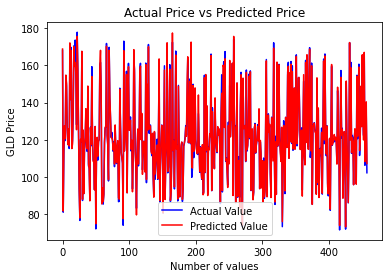

In [38]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='red',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()